In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bom.movie_gross.csv.')
df.head()
# df.shape

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:

titles = df.title.unique()
len(titles)
### There are no repeats

3386

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df['foriegn_int'] = pd.to_numeric(df.foreign_gross.str.replace(',',''))

df['Total_Gross_Millions'] = (df.domestic_gross + df.foriegn_int) / 1000000
df.head()

,title,studio,domestic_gross,foreign_gross,year,foriegn_int,Total_Gross_Millions
0,Toy Story 3,BV,415000000.0,652000000,2010,652000000.0,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,691300000.0,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,664300000.0,960.3
3,Inception,WB,292600000.0,535700000,2010,535700000.0,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,513900000.0,752.6


In [6]:
df_moviebudgets = pd.read_csv('tn.movie_budgets.csv', index_col=0)
df_moviebudgets.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
df_moviebudgets.shape

(5782, 5)

In [8]:
movie = df_moviebudgets.movie.unique()
len(movie)
### There are a few duplicates

5698

In [9]:
# df_reviews = pd.read_csv('rt.reviews.tsv',sep = '\t')
df_movieinfo = pd.read_table('rt.movie_info.tsv', index_col=0)
df_movieinfo.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
### Connect to the IMDB Database
conn = sqlite3.connect('im.db')

In [11]:
q = """
SELECT *
FROM movie_basics
JOIN movie_ratings USING(movie_id)
;
"""
x = pd.read_sql(q, conn)
pd.read_sql(q, conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [12]:
df_budgets = pd.read_csv('tn.movie_budgets.csv',index_col=0)
df_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
df_budgets['budget_millions'] = df_budgets.production_budget.str.replace(',','')
df_budgets['budget_millions'] = df_budgets.budget_millions.str.replace('$','')
df_budgets['budget_millions'] = pd.to_numeric(df_budgets.budget_millions) / 1000000
df_budgets.head()

C:\Users\deapillai\AppData\Local\Temp\ipykernel_44216\2653470430.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['budget_millions'] = df_budgets.budget_millions.str.replace('$','')


,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0


In [14]:

### Create Dataframe

df_runtime_minutes = pd.merge(x,df_budgets,how='inner',left_on = 'primary_title', right_on = 'movie')
df_runtime_minutes.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45.0
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",0.2
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",0.2
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",25.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",25.0


In [15]:
df_runtime = df_runtime_minutes.drop_duplicates(subset=['movie'],
                                         inplace=False)
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2126 non-null   object 
 1   primary_title      2126 non-null   object 
 2   original_title     2126 non-null   object 
 3   start_year         2126 non-null   int64  
 4   runtime_minutes    2072 non-null   float64
 5   genres             2124 non-null   object 
 6   averagerating      2126 non-null   float64
 7   numvotes           2126 non-null   int64  
 8   release_date       2126 non-null   object 
 9   movie              2126 non-null   object 
 10  production_budget  2126 non-null   object 
 11  domestic_gross     2126 non-null   object 
 12  worldwide_gross    2126 non-null   object 
 13  budget_millions    2126 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 249.1+ KB


In [16]:
import seaborn as sns
import scipy.stats as stats

In [17]:
df_runtime.describe()

,start_year,runtime_minutes,averagerating,numvotes,budget_millions
count,2126.000000,2072.000000,2126.000000,2.126000e+03,2126.000000
mean,2013.561148,103.881757,6.231232,8.212615e+04,37.163874
std,2.512421,18.760685,1.142910,1.465604e+05,51.129898
min,2010.000000,5.000000,1.600000,5.000000e+00,0.001400
25%,2011.000000,91.000000,5.600000,7.930000e+02,5.000000
50%,2013.000000,102.000000,6.300000,2.344900e+04,18.250000
75%,2015.000000,114.000000,7.000000,9.486275e+04,45.000000
max,2019.000000,180.000000,9.200000,1.841066e+06,425.000000


In [18]:
 pd.options.mode.chained_assignment = None

In [19]:
#Domestic
df_runtime['domestic_millions'] = df_runtime.domestic_gross.str.replace(',','')
df_runtime['domestic_millions'] = df_runtime.domestic_millions.str.replace('$','')
df_runtime['domestic_millions'] = pd.to_numeric(df_runtime.domestic_millions)
# # #Worldwide
df_runtime['worldwide_millions'] = df_runtime.worldwide_gross.str.replace(',','')
df_runtime['worldwide_millions'] = df_runtime.worldwide_millions.str.replace('$','')
df_runtime['worldwide_millions'] = pd.to_numeric(df_runtime.worldwide_millions)


C:\Users\deapillai\AppData\Local\Temp\ipykernel_44216\2282399076.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_runtime['domestic_millions'] = df_runtime.domestic_millions.str.replace('$','')
C:\Users\deapillai\AppData\Local\Temp\ipykernel_44216\2282399076.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_runtime['worldwide_millions'] = df_runtime.worldwide_millions.str.replace('$','')


In [20]:
df_runtime['domestic_millions'] = pd.to_numeric(df_runtime.domestic_millions) / 1000000
df_runtime['worldwide_millions'] = pd.to_numeric(df_runtime.worldwide_millions) / 1000000

In [21]:
df_runtime['production_budget'] = df_runtime.production_budget.str.replace(',','')
df_runtime['production_budget'] = df_runtime.production_budget.str.replace('$','')
df_runtime['production_budget'] = pd.to_numeric(df_runtime.production_budget)


C:\Users\deapillai\AppData\Local\Temp\ipykernel_44216\1529873331.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_runtime['production_budget'] = df_runtime.production_budget.str.replace('$','')


In [22]:
df_runtime['production_budget'] = pd.to_numeric(df_runtime.production_budget) / 1000000

In [23]:
df_runtime['ROI'] = (df_runtime.worldwide_millions - df_runtime.production_budget)/df_runtime.production_budget

In [24]:
df_runtime.ROI.describe()

count    2126.000000
mean        2.627956
std        13.627146
min        -1.000000
25%        -0.635096
50%         0.685090
75%         2.644018
max       415.564740
Name: ROI, dtype: float64

In [25]:
df_runtime.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions,domestic_millions,worldwide_millions,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,45.0,$0,"$73,706",45.0,0.000000,0.073706,-0.998362
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",The Overnight,0.2,"$1,109,808","$1,165,996",0.2,1.109808,1.165996,4.829980
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,25.0,"$720,828","$9,313,302",25.0,0.720828,9.313302,-0.627468
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",The Secret Life of Walter Mitty,91.0,"$58,236,838","$187,861,183",91.0,58.236838,187.861183,1.064409
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",A Walk Among the Tombstones,28.0,"$26,017,685","$62,108,587",28.0,26.017685,62.108587,1.218164


In [26]:
df_runtime['runtime_minutes'].mean()

103.88175675675676

In [27]:
import seaborn as sns

In [28]:
df_runtime.rename(columns={"production_budget":"budget_millions"})

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,budget_millions,domestic_gross,worldwide_gross,budget_millions,domestic_millions,worldwide_millions,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,45.000,$0,"$73,706",45.000,0.000000,0.073706,-0.998362
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",The Overnight,0.200,"$1,109,808","$1,165,996",0.200,1.109808,1.165996,4.829980
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,25.000,"$720,828","$9,313,302",25.000,0.720828,9.313302,-0.627468
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",The Secret Life of Walter Mitty,91.000,"$58,236,838","$187,861,183",91.000,58.236838,187.861183,1.064409
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",A Walk Among the Tombstones,28.000,"$26,017,685","$62,108,587",28.000,26.017685,62.108587,1.218164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016,NaN,Drama,9.1,28,"Dec 29, 1995",Richard III,9.200,"$2,684,904","$4,199,334",9.200,2.684904,4.199334,-0.543551
2871,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,"Oct 24, 2008",Heroes,0.400,"$655,538","$655,538",0.400,0.655538,0.655538,0.638845
2872,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,"Feb 6, 2009",Push,38.000,"$31,811,527","$49,678,401",38.000,31.811527,49.678401,0.307326
2873,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,"Mar 29, 2019",Unplanned,6.000,"$18,107,621","$18,107,621",6.000,18.107621,18.107621,2.017937


In [29]:
df_runtime.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_millions,domestic_millions,worldwide_millions,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,45.0,$0,"$73,706",45.0,0.000000,0.073706,-0.998362
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",The Overnight,0.2,"$1,109,808","$1,165,996",0.2,1.109808,1.165996,4.829980
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,25.0,"$720,828","$9,313,302",25.0,0.720828,9.313302,-0.627468
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",The Secret Life of Walter Mitty,91.0,"$58,236,838","$187,861,183",91.0,58.236838,187.861183,1.064409
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",A Walk Among the Tombstones,28.0,"$26,017,685","$62,108,587",28.0,26.017685,62.108587,1.218164


<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

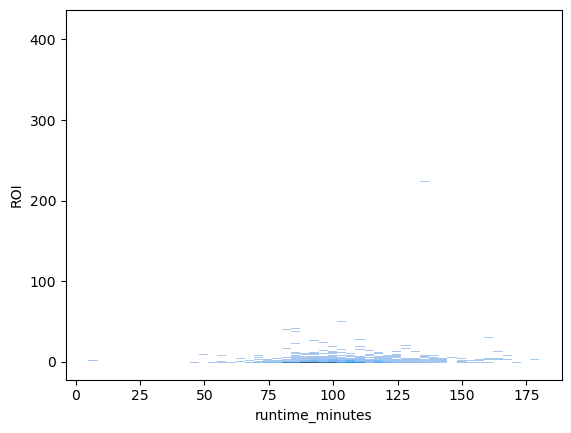

In [30]:
sns.histplot(x=df_runtime.runtime_minutes,
             y=df_runtime.ROI)

<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

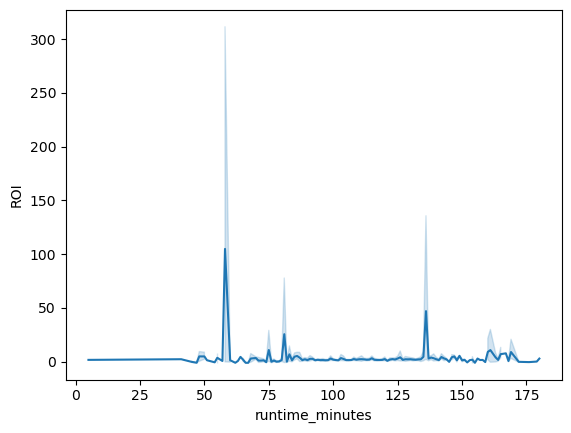

In [31]:
sns.lineplot(x=df_runtime.runtime_minutes,
             y=df_runtime.ROI)

<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

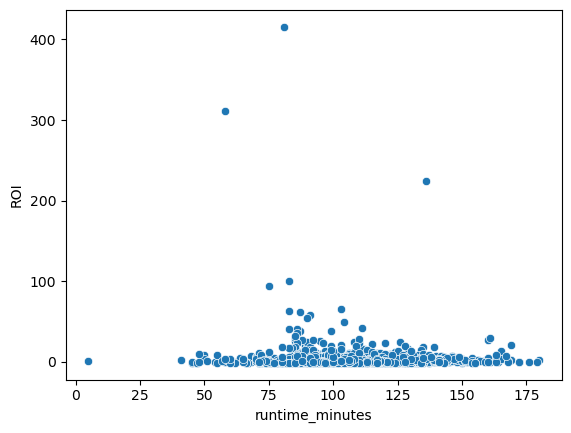

In [32]:
sns.scatterplot(x=df_runtime.runtime_minutes,
             y=df_runtime.ROI)

In [33]:
df = df_runtime.drop(df_runtime[df_runtime['averagerating'] < 7.1].index, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 1 to 2872
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            515 non-null    object 
 1   primary_title       515 non-null    object 
 2   original_title      515 non-null    object 
 3   start_year          515 non-null    int64  
 4   runtime_minutes     496 non-null    float64
 5   genres              514 non-null    object 
 6   averagerating       515 non-null    float64
 7   numvotes            515 non-null    int64  
 8   release_date        515 non-null    object 
 9   movie               515 non-null    object 
 10  production_budget   515 non-null    float64
 11  domestic_gross      515 non-null    object 
 12  worldwide_gross     515 non-null    object 
 13  budget_millions     515 non-null    float64
 14  domestic_millions   515 non-null    float64
 15  worldwide_millions  515 non-null    float64
 16  ROI    

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

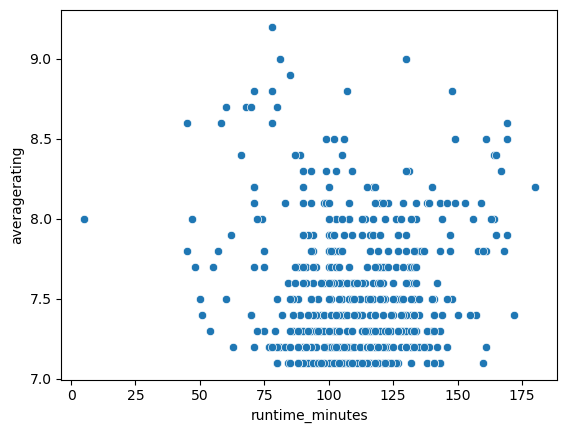

In [34]:
sns.scatterplot(x=df.runtime_minutes,
             y=df.averagerating)

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

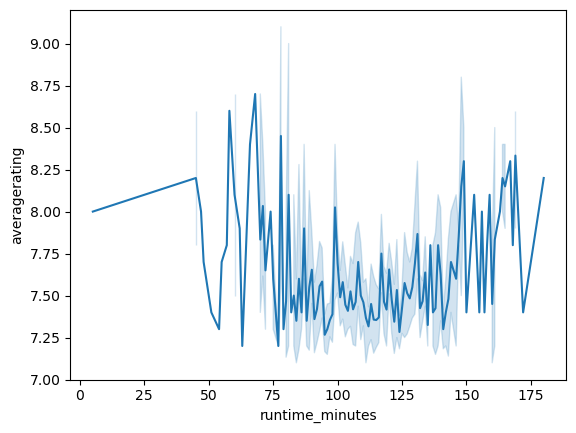

In [35]:
sns.lineplot(x=df.runtime_minutes,
             y=df.averagerating)

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

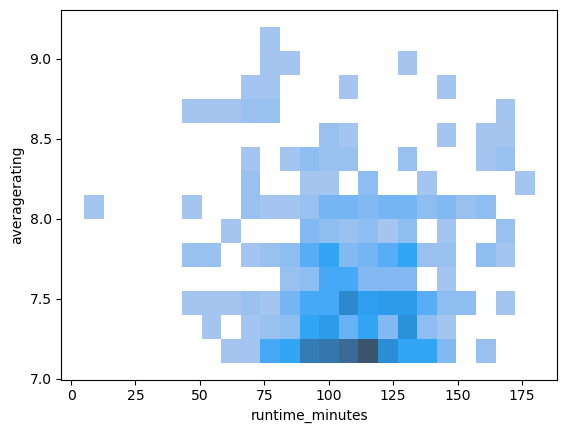

In [36]:
sns.histplot(x=df.runtime_minutes,
         y=df.averagerating)

<AxesSubplot:xlabel='averagerating', ylabel='Count'>

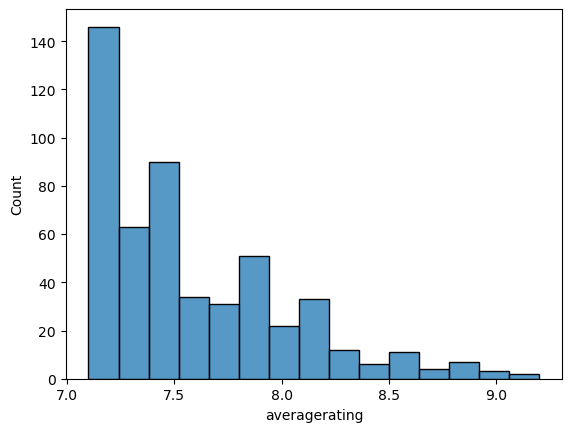

In [37]:
sns.histplot(x=df.averagerating
           )

In [38]:
df.averagerating.describe()

count    515.000000
mean       7.574951
std        0.438752
min        7.100000
25%        7.200000
50%        7.400000
75%        7.800000
max        9.200000
Name: averagerating, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

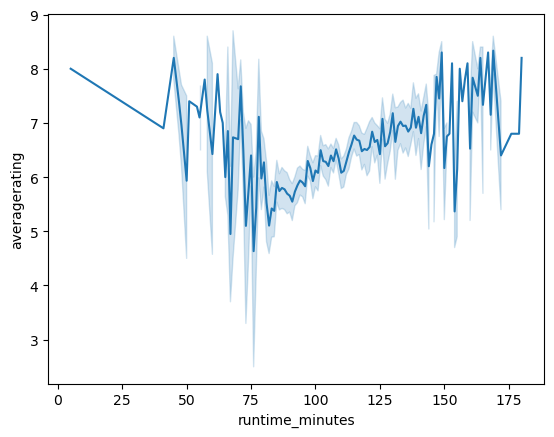

In [39]:
sns.lineplot(x=df_runtime.runtime_minutes,
             y=df_runtime.averagerating)

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

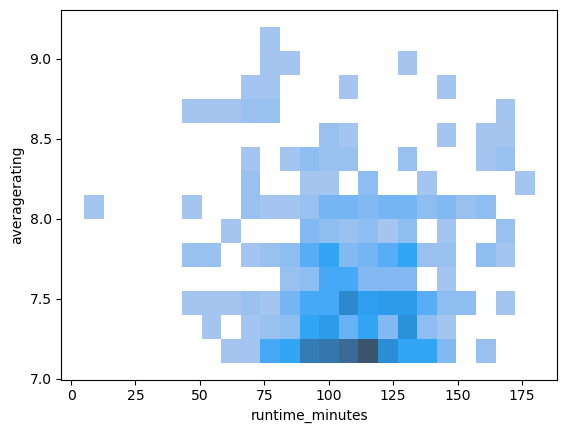

In [44]:
sns.histplot(x=df.runtime_minutes,
             y=df.averagerating)

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

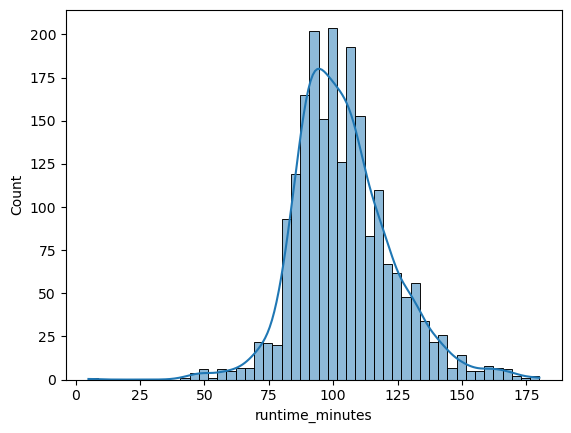

In [41]:
sns.histplot(x=df_runtime.runtime_minutes, kde=True)

In [48]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,budget_millions,domestic_millions,worldwide_millions,ROI
count,515.000000,496.000000,515.000000,5.150000e+02,515.000000,515.000000,515.000000,515.000000,515.000000
mean,2013.852427,110.516129,7.574951,1.729716e+05,45.053837,45.053837,72.401011,177.479234,3.070011
std,2.537188,23.781831,0.438752,2.341522e+05,59.366843,59.366843,107.463840,284.045313,4.994465
min,2010.000000,5.000000,7.100000,5.000000e+00,0.015000,0.015000,0.000000,0.000000,-1.000000
25%,2012.000000,96.000000,7.200000,9.765000e+02,8.000000,8.000000,4.338645,11.279046,0.110048
50%,2014.000000,109.000000,7.400000,8.157500e+04,20.000000,20.000000,30.376755,59.596747,1.723292
75%,2016.000000,126.250000,7.800000,2.630700e+05,51.350000,51.350000,94.385759,202.497705,4.052838
max,2019.000000,180.000000,9.200000,1.841066e+06,330.600000,330.600000,700.059566,2048.134200,50.073590


<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

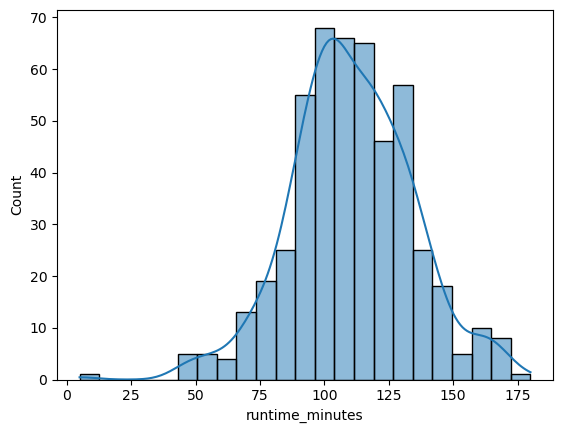

In [58]:
sns.histplot(x=df.runtime_minutes, kde=True,)

In [49]:
df2 = df_runtime.drop(df_runtime[df_runtime['averagerating'] > 7.1].index, inplace=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 2874
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1680 non-null   object 
 1   primary_title       1680 non-null   object 
 2   original_title      1680 non-null   object 
 3   start_year          1680 non-null   int64  
 4   runtime_minutes     1645 non-null   float64
 5   genres              1679 non-null   object 
 6   averagerating       1680 non-null   float64
 7   numvotes            1680 non-null   int64  
 8   release_date        1680 non-null   object 
 9   movie               1680 non-null   object 
 10  production_budget   1680 non-null   float64
 11  domestic_gross      1680 non-null   object 
 12  worldwide_gross     1680 non-null   object 
 13  budget_millions     1680 non-null   float64
 14  domestic_millions   1680 non-null   float64
 15  worldwide_millions  1680 non-null   float64
 16  ROI   

AttributeError: 'PolyCollection' object has no property 'xlabel'

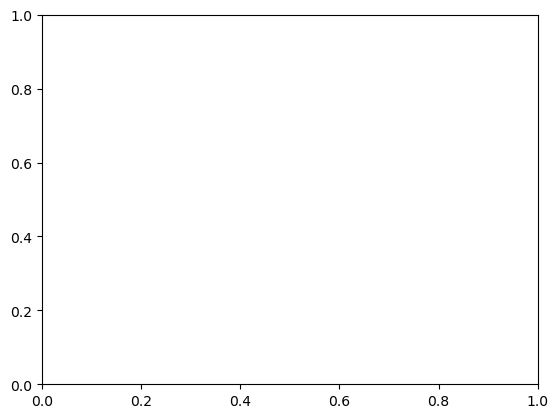

In [55]:
sns.histplot(x=df2.runtime_minutes, bins = 10, kde=True, AxesSubplot:xlabel='runtime_minutes', ylabel='Count')